# MLP for image classification

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data

In [30]:
(X_train, y_train), (X_test, y_test) = load_data()

In [31]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## Normalize data

In [32]:
print(f"min: {X_train.min()} max: {X_train.max()}")

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

X_test.min(), X_test.max()

min: 0 max: 255


(0.0, 1.0)

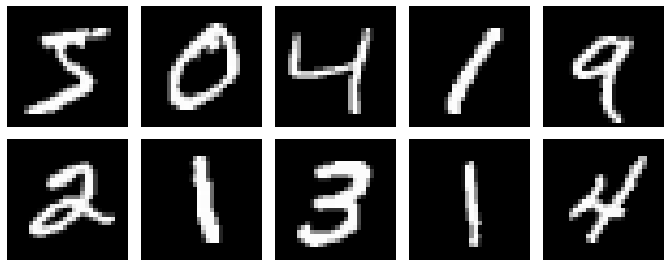

In [33]:
def display_images(data, nrows = 2, ncols = 5, figsize = (12, 4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap = "gray")
        ax.axis("off")
    
    fig.subplots_adjust(wspace = 0, hspace = .1, bottom = 0)

display_images(X_train)

## MLP model

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [35]:
def MLP_model(nodes = None, names = None, activations = []):
    model = Sequential(name = "MLP_model")
    model.add(Flatten(input_shape = (28, 28), name = "Input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))

    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    return model

model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations = ["softmax"])
model_1.summary()
# 28x28 -> 784 -> 784 weights & 1 bias -> 785 * 10 (output nodes) -> 7850

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_1.fit(X_train, y_train, validation_split = 1/6, epochs = 20, verbose = 0)

In [37]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.506142,0.86878,0.308765,0.9147
1,0.316867,0.91162,0.278430,0.9217
2,0.292998,0.91786,0.268425,0.9241
3,0.281366,0.92082,0.265843,0.9284
4,0.273333,0.92280,0.260512,0.9282


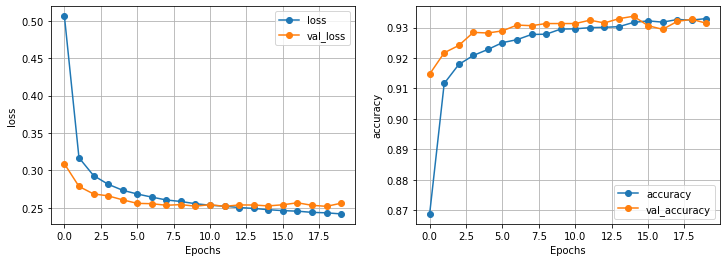

In [39]:
def plot_history(df_history, style = "-o"):
    _, axes = plt.subplots(1,2, figsize = (12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, col in zip(axes, columns):
        df_history.plot(y = col, xlabel = "Epochs", ylabel = col[0], ax = ax, style = style)
        ax.grid()

plot_history(metrics)

## Hidden layers

In [40]:
model_2 = MLP_model(nodes = [128, 128, 10], activations = ["relu", "relu", "softmax"], names = ["Hidden1", "Hidden2", "Output"])
model_2.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 128)               100480    
                                                                 
 Hidden2 (Dense)             (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_2.fit(X_train, y_train, validation_split = 1/6, epochs = 20, verbose = 1)

Epoch 1/20
1563/1563 [==============================] - 1s 811us/step - loss: 0.2514 - accuracy: 0.9254 - val_loss: 0.1317 - val_accuracy: 0.9625
Epoch 2/20
1563/1563 [==============================] - 1s 778us/step - loss: 0.1056 - accuracy: 0.9677 - val_loss: 0.1275 - val_accuracy: 0.9612
Epoch 3/20
1563/1563 [==============================] - 1s 792us/step - loss: 0.0719 - accuracy: 0.9774 - val_loss: 0.0864 - val_accuracy: 0.9736
Epoch 4/20
1563/1563 [==============================] - 1s 856us/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.0903 - val_accuracy: 0.9744
Epoch 5/20
1563/1563 [==============================] - 1s 800us/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0924 - val_accuracy: 0.9748
Epoch 6/20
1563/1563 [==============================] - 1s 806us/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0818 - val_accuracy: 0.9778
Epoch 7/20
1563/1563 [==============================] - 1s 794us/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0887 -

In [44]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))

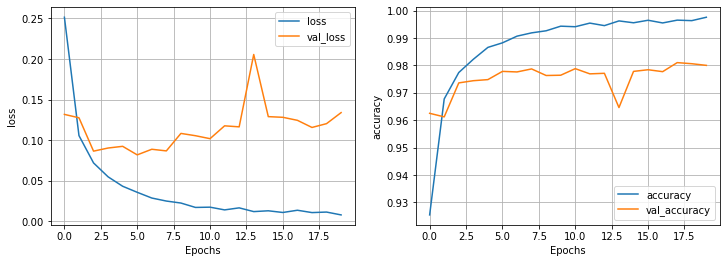

In [45]:
plot_history(metrics, style="-")

In [46]:
model_3 = MLP_model(nodes = [128, 128, 10], activations = ["relu", "relu", "softmax"], names = ["Hidden1", "Hidden2", "Output"])
model_3.fit(X_train, y_train, epochs = 5, verbose = 1) # early stopping, and train on all traning data (no validation)

Epoch 1/5
1875/1875 [==============================] - 1s 721us/step - loss: 0.2277 - accuracy: 0.9334
Epoch 2/5
1875/1875 [==============================] - 1s 703us/step - loss: 0.0967 - accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 1s 695us/step - loss: 0.0654 - accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 1s 765us/step - loss: 0.0503 - accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 1s 701us/step - loss: 0.0418 - accuracy: 0.9866


## Prediction and evaluation

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.95      0.99      0.97       982
           5       0.97      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



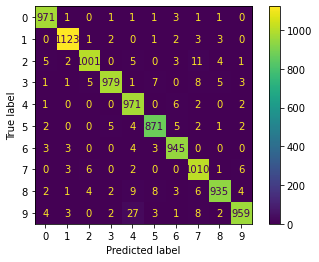

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Misclassification

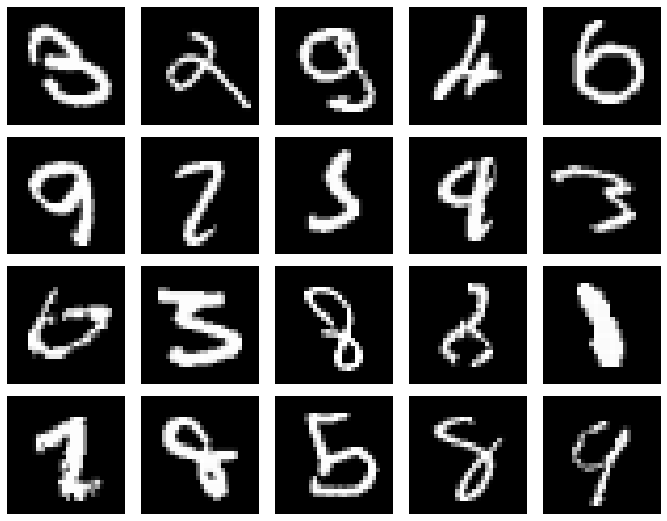

In [53]:
misclassfied_indices = np.where(y_pred != y_test)
misclassfied_samples = X_test[misclassfied_indices]
display_images(misclassfied_samples, 4, 5, (12, 8))